<a href="https://colab.research.google.com/github/Lokendra-parmar/python-programming-questions/blob/main/BOWpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv("/content/email_text.csv")

In [3]:
df.head(10)

,label,text
0,0,user id enrondlr pw bnawebescapenumber origina...
1,0,hi chris tonight we are rolling out a new repo...
2,0,rika r these new original message from thomas ...
3,0,john gerald we are currently trading under gtc...
4,0,gerald and stacy attached is a worksheet for a...
5,0,fyi below is a copy of my communication with m...
6,0,pg e gt nw plans lateral across washington sta...
7,0,mark i am working with the east power desk to ...
8,0,oops here it is kal original message from shah...
9,0,mark and charlie fmpa is ready to bill us for ...


In [4]:
label_distribution = df['label'].value_counts()
display(label_distribution)

,count
label,
0,9840
1,7575


The above output shows the count of each unique value in the 'label' column. We can also visualize this distribution using a bar plot to better understand the proportion of each label.

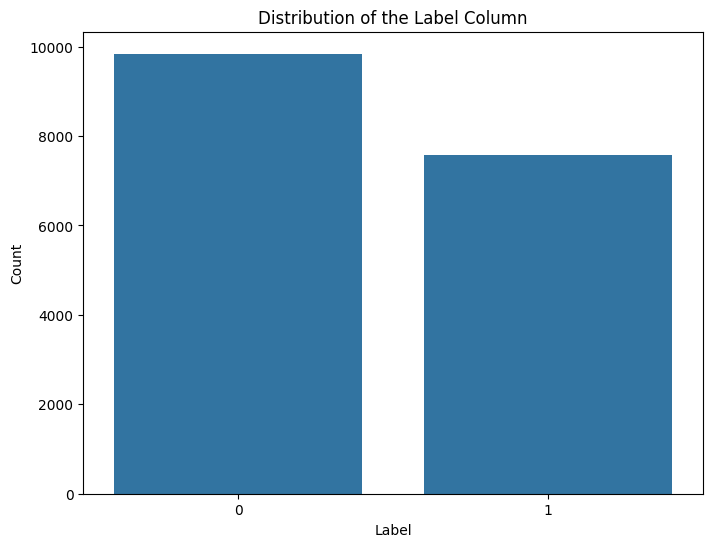

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values)
plt.title('Distribution of the Label Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [6]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [8]:
corpus=[]
for i in range (0,len(df)):
  review = re.sub('[^a-zA-z]',' ',df['text'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

# **Create Bag of Words**

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500,ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()


In [10]:
cv.vocabulary_

{'user': np.int64(2369),
 'id': np.int64(1130),
 'origin': np.int64(1610),
 'messag': np.int64(1442),
 'bna': np.int64(257),
 'highlight': np.int64(1096),
 'sent': np.int64(2023),
 'thursday': np.int64(2262),
 'june': np.int64(1260),
 'escapenumb': np.int64(746),
 'pm': np.int64(1716),
 'subject': np.int64(2179),
 'inc': np.int64(1152),
 'daili': np.int64(528),
 'labor': np.int64(1286),
 'report': np.int64(1900),
 'tabl': np.int64(2211),
 'content': np.int64(465),
 'regist': np.int64(1874),
 'web': np.int64(2413),
 'subscrib': np.int64(2183),
 'access': np.int64(8),
 'full': np.int64(1019),
 'text': np.int64(2246),
 'articl': np.int64(140),
 'use': np.int64(2365),
 'url': np.int64(2359),
 'link': np.int64(1333),
 'suppli': np.int64(2200),
 'inform': np.int64(1169),
 'becom': np.int64(208),
 'sign': np.int64(2068),
 'free': np.int64(1009),
 'trial': np.int64(2313),
 'avail': np.int64(173),
 'http': np.int64(1123),
 'com': np.int64(400),
 'call': np.int64(300),
 'custom': np.int64(522),


In [11]:
y=df['label']

In [12]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
17410,0
17411,0
17412,0
17413,0


In [17]:
np.set_printoptions(edgeitems=30,linewidth =100000,
                    formatter = dict(float=lambda x: "%.3g" % x))
X

array([[ 3,  3,  0,  3,  0,  0,  0,  0,  2,  1,  2,  0,  0,  0,  0,  1,  4,  0,  0,  0,  1,  1,  0,  1,  0,  0,  0,  0,  2,  5, ...,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  1,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, ...,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0, ...,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0, ...,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [19]:
from sklearn.naive_bayes import MultinomialNB

In [20]:
spam_detect_model = MultinomialNB().fit(X_train,y_train)

In [21]:
y_pred = spam_detect_model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
accuracy_score(y_test,y_pred)

0.8380706287683032

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.99      0.88      2002
           1       0.98      0.63      0.77      1481

    accuracy                           0.84      3483
   macro avg       0.88      0.81      0.82      3483
weighted avg       0.87      0.84      0.83      3483

